# User Satsfaction Score Prediction

In [25]:
import pandas as pd
import os
import sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [26]:
# Load the xdr_cleaned dataset
data = pd.read_csv('../data/xdr_cleaned.csv')

In [27]:
# Import modules
from user_engagement_analysis import UserEngagementAnalysis
from experience_analytics import ExperienceAnalytics
from satisfaction_analytics import UserSatisfactionAnalytics

In [28]:
# Create instances of engagement and user experience classes
engagement_analysis = UserEngagementAnalysis(data)
experience_analysis = ExperienceAnalytics(data)
satisfaction_analysis = UserSatisfactionAnalytics()

In [29]:
# Normalize and cluster
# Aggregate engagement metrics
engagement_analysis.aggregate_metrics()
engagement_analysis.metrics.head()
engagement_analysis.normalize_and_cluster(n_clusters=3)

In [30]:
# Computer Engagement Score
engagement_features = [
    'total_session_duration',
    'total_download_traffic',
    'total_upload_traffic', 
    'sessions_frequency']

# Identify least engaged cluster
least_engaged_cluster = engagement_analysis.cluster_centers[engagement_features].sum(axis=1).idxmin()

# Compute engagement scores
engagement_scores = satisfaction_analysis.compute_score(
    engagement_analysis.metrics, 
    engagement_analysis.cluster_centers, 
    engagement_features, 'Engagement_Score',
    least_engaged_cluster)

In [31]:
#Check for duplicates in the 'MSISDN/Number' column and count them
duplicate_count = engagement_analysis.metrics.duplicated('MSISDN/Number').sum()
print(f"Number of duplicate entries in 'MSISDN/Number': {duplicate_count}")

Number of duplicate entries in 'MSISDN/Number': 0


In [32]:
engagement_scores.head(20)

,MSISDN/Number,Engagement_Score
0,3.361370e+10,3.376757e+12
1,3.361370e+10,1.851072e+08
2,3.361370e+10,9.416116e+08
3,3.361370e+10,4.739266e+08
4,3.361370e+10,6.141363e+07
5,3.361370e+10,5.971572e+08
6,3.361371e+10,1.546607e+08
7,3.361371e+10,2.179564e+07
8,3.361371e+10,3.442113e+08
9,3.361371e+10,1.355662e+08


In [33]:
# User experience clusters
# Define features
experience_features = ['TCP Retransmission', 'RTT', 'Throughput']

# aggregate and cluster
experience_df, cluster_centers = experience_analysis.k_means_clustering(experience_features)
# rename cluster column
experience_df.rename(columns={'Cluster':'cluster'}, inplace=True)
cluster_centers.rename(columns={'Cluster':'cluster'}, inplace=True)
# Identify worst experience cluster
worst_cluster = cluster_centers[experience_features].sum(axis=1).idxmin()

In [34]:
# Computer User experience scores
experience_scores = satisfaction_analysis.compute_score(
    experience_df, 
    cluster_centers, 
    experience_features, 'Experience_Score',
    worst_cluster)

Engagement vs Experience Scores

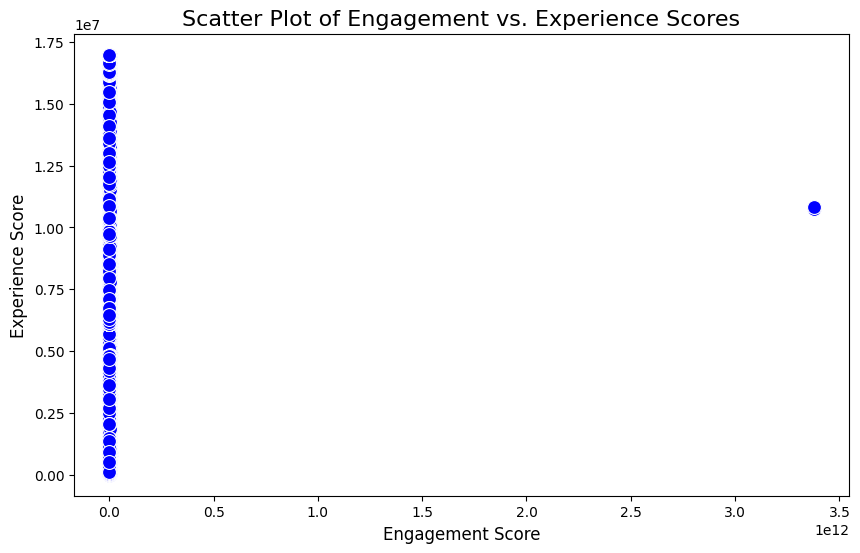

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=engagement_scores['Engagement_Score'], 
    y=experience_scores['Experience_Score'], 
    data=pd.merge(engagement_scores,experience_scores, on='MSISDN/Number'), color='blue', s=100)

# Add titles and labels
plt.title('Scatter Plot of Engagement vs. Experience Scores', fontsize=16)
plt.xlabel('Engagement Score', fontsize=12)
plt.ylabel('Experience Score', fontsize=12)

# Show the plot
plt.show()

In [42]:
experience_scores.head(20)

,MSISDN/Number,Experience_Score
0,3.361370e+10,1.073505e+07
1,3.361370e+10,8.439461e+06
2,3.361370e+10,1.698216e+07
3,3.361370e+10,1.698216e+07
4,3.361370e+10,1.698216e+07
5,3.361370e+10,6.342372e+06
6,3.361371e+10,4.035042e+06
7,3.361371e+10,1.698216e+07
8,3.361371e+10,1.698215e+07
9,3.361371e+10,2.465024e+06


In [43]:
# Compute satisfaction scores and get top 10 satisfied customers
satisfaction_scores = satisfaction_analysis.compute_satisfaction_score(
    engagement_scores, 
    experience_scores)

In [44]:
# Top 10 Satisfied customers
top_10_satisfied_customers = satisfaction_analysis.top_satisfied_customer(
    engagement_scores, 
    experience_scores
)
top_10_satisfied_customers

,MSISDN/Number,Satisfaction_Score
95260,3.376819e+10,1.688610e+12
0,3.361370e+10,1.688384e+12
762,3.361489e+10,3.786768e+09
86854,3.376054e+10,3.671794e+09
7475,3.362578e+10,3.609385e+09
70367,3.367588e+10,3.393835e+09
7819,3.362632e+10,3.388012e+09
31235,3.365973e+10,3.284688e+09
57114,3.366646e+10,3.169832e+09
86509,3.376041e+10,2.997929e+09


In [36]:

# Satisfaction prediction using LinearRegression Model
satisfaction_analysis.build_regression_model(
    engagement_scores, experience_scores)

Mean Squared Error: 3.1321648144940055e-12
R-squared: 1.0


LinearRegression()

In [37]:
# Satisfaction prediction using Lasso Model
satisfaction_analysis.build_regression_model(
    engagement_scores, experience_scores, model_type='lasso')

Mean Squared Error: 0.318122505289547
R-squared: 1.0


Lasso()

In [38]:
# Satisfaction prediction using Ridge Model
satisfaction_analysis.build_regression_model(
    engagement_scores, experience_scores, model_type='rigde')

Mean Squared Error: 1.533256707124188e-10
R-squared: 1.0


Ridge()

In [39]:
# Clustering engagement scores and experience scores
cluster_df = satisfaction_analysis.perform_clustering(
    engagement_scores, experience_scores
)

In [40]:
cluster_df

,MSISDN/Number,Engagement_Score,Experience_Score,Satisfaction_Score,Cluster
0,3.361370e+10,3.376757e+12,1.073505e+07,1.688384e+12,1
1,3.361370e+10,1.851072e+08,8.439461e+06,9.677332e+07,0
2,3.361370e+10,9.416116e+08,1.698216e+07,4.792969e+08,0
3,3.361370e+10,4.739266e+08,1.698216e+07,2.454544e+08,0
4,3.361370e+10,6.141363e+07,1.698216e+07,3.919790e+07,0
...,...,...,...,...,...
95256,3.376818e+10,1.119838e+09,1.698216e+07,5.684102e+08,0
95257,3.376818e+10,4.398138e+07,1.698216e+07,3.048177e+07,0
95258,3.376819e+10,4.583206e+08,1.698216e+07,2.376514e+08,0
95259,3.376819e+10,1.185086e+08,6.469375e+06,6.248900e+07,0


In [45]:
# Aggregate the average satisfaction and experience scores per cluster
cluster_agg = cluster_df.groupby('Cluster').agg({
    'Experience_Score': 'mean',
    'Satisfaction_Score': 'mean'
}).reset_index()

In [46]:
cluster_agg

,Cluster,Experience_Score,Satisfaction_Score
0,0,1.180863e+07,1.695807e+08
1,1,1.078586e+07,1.688497e+12


In [47]:
# Insert the satisfaction scores data into postgresql
satisfaction_analysis.export_to_postgresql(satisfaction_scores)

Connection to database successful!


In [48]:
# Save the engagement and experience scores as csv files for dashboard
engagement_scores.to_csv('../data/engagement_score.csv')
experience_scores.to_csv('../data/experience_score.csv')